In [1]:

import matplotlib.pyplot as plt
from collections import Counter
from time import time  #قيمة الوقت الحالي
from math import floor 
import numpy as np

def histogram(data, title="Histogram", bins=None, proba=False):
    if all(isinstance(val, float) for val in data): #أعداد عشرية
        if bins is None: bins=10
        plt.hist(data, bins=bins, alpha=0.7, edgecolor="black", density=proba)
    elif all(isinstance(val, int) for val in data): #أعداد صحيحة 
        if bins is None: bins=range(min(data), max(data) + 2)
        plt.hist(data, bins=bins, alpha=0.7, edgecolor="black", rwidth=0.6, align="left", density=proba)
    else: #سلاسل نصية
        data = [str(val) for val in data]
        value_counts = dict(sorted(Counter(data).items()))
        unique_values = list(value_counts.keys())
        frequencies = list(value_counts.values())
        if proba:
            total_freq = sum(frequencies)
            frequencies = [freq/total_freq for freq in frequencies]
        plt.bar(unique_values, frequencies, alpha=0.7, edgecolor='black', width=0.6)
        plt.xticks(rotation=45)

    plt.title(title)
    plt.xlabel("Values")
    plt.ylabel("Probability" if proba else "Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


class RandomGenerator:
    multiplier=1664525   #large prime number  عدد أولي كبير
    increment=1013904223  #large prime number  عدد أولي كبير
    modulus=2**15         #large number   عدد كبير
      #Initial seed using actual time  قيمة البذرة الأولى (تأخذ قيمة الوقت الحالي)
    
    
    def __init__(self) -> None:
        self.seed = floor(time())
    # implement the following class methods   قم بإنجاز الطرق التالية   
    
    # generate a random value in [0,1[ using LCG method  توليد قيمة عشوائية باستخدام طريقة مولد الأعداد الخطي
    def generate(self):
        self.seed = (self.multiplier * self.seed + self.increment) % self.modulus
        return self.seed / self.modulus

    #generate a random float value inside the interval [minv, maxv[ using generate() method
    #generate() باستخدام دالة [minv, maxv[ توليد عدد عشوائي عشري داخل المجال
    #display an error if minv>=maxv  أظهر خطأ إذا كان 
    def generateFloat(self, minv, maxv):
        if minv >= maxv:
            raise ValueError("minv should be lesser than maxv")
        return minv + (maxv - minv) * self.generate()   
    
    #generate a random int value inside the interval [minv, maxv[ using generateFloat and floor methods
    #floor و generateFloat باستخدام دالة [minv, maxv[ توليد عدد عشوائي صحيح داخل المجال
    def generateInt(self, minv, maxv):
        return int(self.generateFloat(minv, maxv))
    
    #use generateFloat to generate a list of n values
    #عدد عشوائي عشري n لتوليد قائمة من generateFloat استخدام الدالة 
    def generateFloats(self, minv, maxv, n):
        return [self.generateFloat(minv, maxv) for _ in range(n)]

    #use generateInt to generate a list of n values
    #عدد عشوائي صحيح n لتوليد قائمة من generateInt استخدام الدالة 
    def generateInts(self, minv, maxv, n):
        return [self.generateInt(minv, maxv) for _ in range(n)]
    
    #use the precedent implemented methods to choose n random values from the data list
    #repeat: True -> values can be duplicated, False -> values cannot be duplicated
    #data قيمة عشوائية من قائمة البيانات n قم بالاستفادة من الطرق المُنجزة مُسبقًا لاختيار
    #repeat: True -> يمكن تكرار القيم، False -> لا تكرار للقيم
    def choose(self, data, n, repeat=True):
       
        if repeat:
            return [data[self.generateInt(0,len(data))] for _ in range(n)]
        
        else:
            chosen_indices = set()
            chosen_values = []
            while len(chosen_values) < n:
                index = self.generateInt(0, len(data))
                if index not in chosen_indices:
                    chosen_indices.add(index)
                    chosen_values.append(data[index])
            return chosen_values
random = RandomGenerator()

print(random.generateInt(1,7))
print(random.generateFloat(1,4))

4
3.894439697265625


we iterate over 20.000 iterations in each iteration we choose from one of the orders in the menu
by generating number between 0 and 100
if the number is in menu_order interval we choose that order

explaining the logic :
sandwich is 30 % == possiblity of getting number between 0 and 30 is 30% in generatingINt(0,100) 
pizza is 10 % == possiblity of getting number between 30 and 40 is 10% in generatingINt(0,100) 

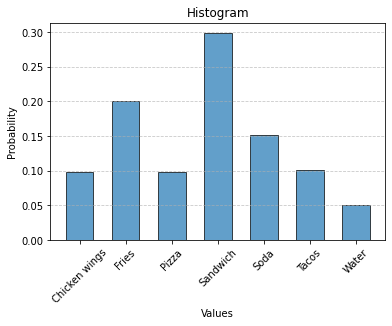

In [2]:
# 30% , 10% , 10% , 20% ,10 ,5% , 15%
# probs = [0.3,0.1,0.1,0.2,0.1,0.05,0.15]

orders = ["Sandwich", "Pizza", "Tacos", "Fries", "Chicken wings", "Water", "Soda"]

# 10 orders
ten = random.choose(orders,10)


def generate_orders():
    rnd = random.generate()
    if rnd <= 0.3 :
        return orders[0]
    elif 0.3< rnd <= 0.4 :
        return orders[1]
    elif 0.4< rnd <= 0.5 :
        return orders[2]
    elif 0.5< rnd <= 0.7 :
        return orders[3]
    elif 0.7< rnd <= 0.8 :
        return orders[4]
    elif 0.8< rnd <= 0.85 :
        return orders[5]
    elif 0.85< rnd <= 1 :
        return orders[6]

orders_2 = [generate_orders() for i in range(20000)]

histogram(orders_2,proba=True)
    

we have 50 order in 1 hour on average that means we have 50/3600 = 0.0138 order in 1 sec on average
we use this probillity to see if we have order every second and stop when we reach 200 order

explain the logic :
we increase the time i every step in the loop
get_order() will return True if we have order in this specific second on the loop and false if we don't 
if we have 200 order we break the loop
so we have i seconds the time it took us to break the loop (have 200 order)

In [3]:
# probility for 1 sec is 50/3600 = 0.0138
import pandas as pd
def get_order():
    rnd = random.generate()
    if rnd <= 0.0138 :
        return True
    return False

orders = []
orders_time = []
i=0
while len(orders)<200 :
    if get_order():
        orders.append("order_"+str(i))
        orders_time.append(i)
    i+=1
data = list(zip(orders,orders_time))

df = pd.DataFrame(data,columns=["order","order_time"])

print(df.shape)
print(f"we need {i:.2f} seconds to reach 200 order")
print(f"we need {i/60:.2f} minutes to reach 200 order")
print(f"we need {i/3600:.2f} hours to reach 200 order")
df["order_time_min"]= np.floor(df["order_time"]/60)
df["order_time_h"]= np.floor(df["order_time"]/3600)
df.tail()


(200, 2)
we need 14643.00 seconds to reach 200 order
we need 244.05 minutes to reach 200 order
we need 4.07 hours to reach 200 order


,order,order_time,order_time_min,order_time_h
195,order_14416,14416,240.0,4.0
196,order_14552,14552,242.0,4.0
197,order_14619,14619,243.0,4.0
198,order_14624,14624,243.0,4.0
199,order_14642,14642,244.0,4.0
